In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import SGD
from tensorflow.keras import datasets
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import tensorflow_hub as hub

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Preprocess the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



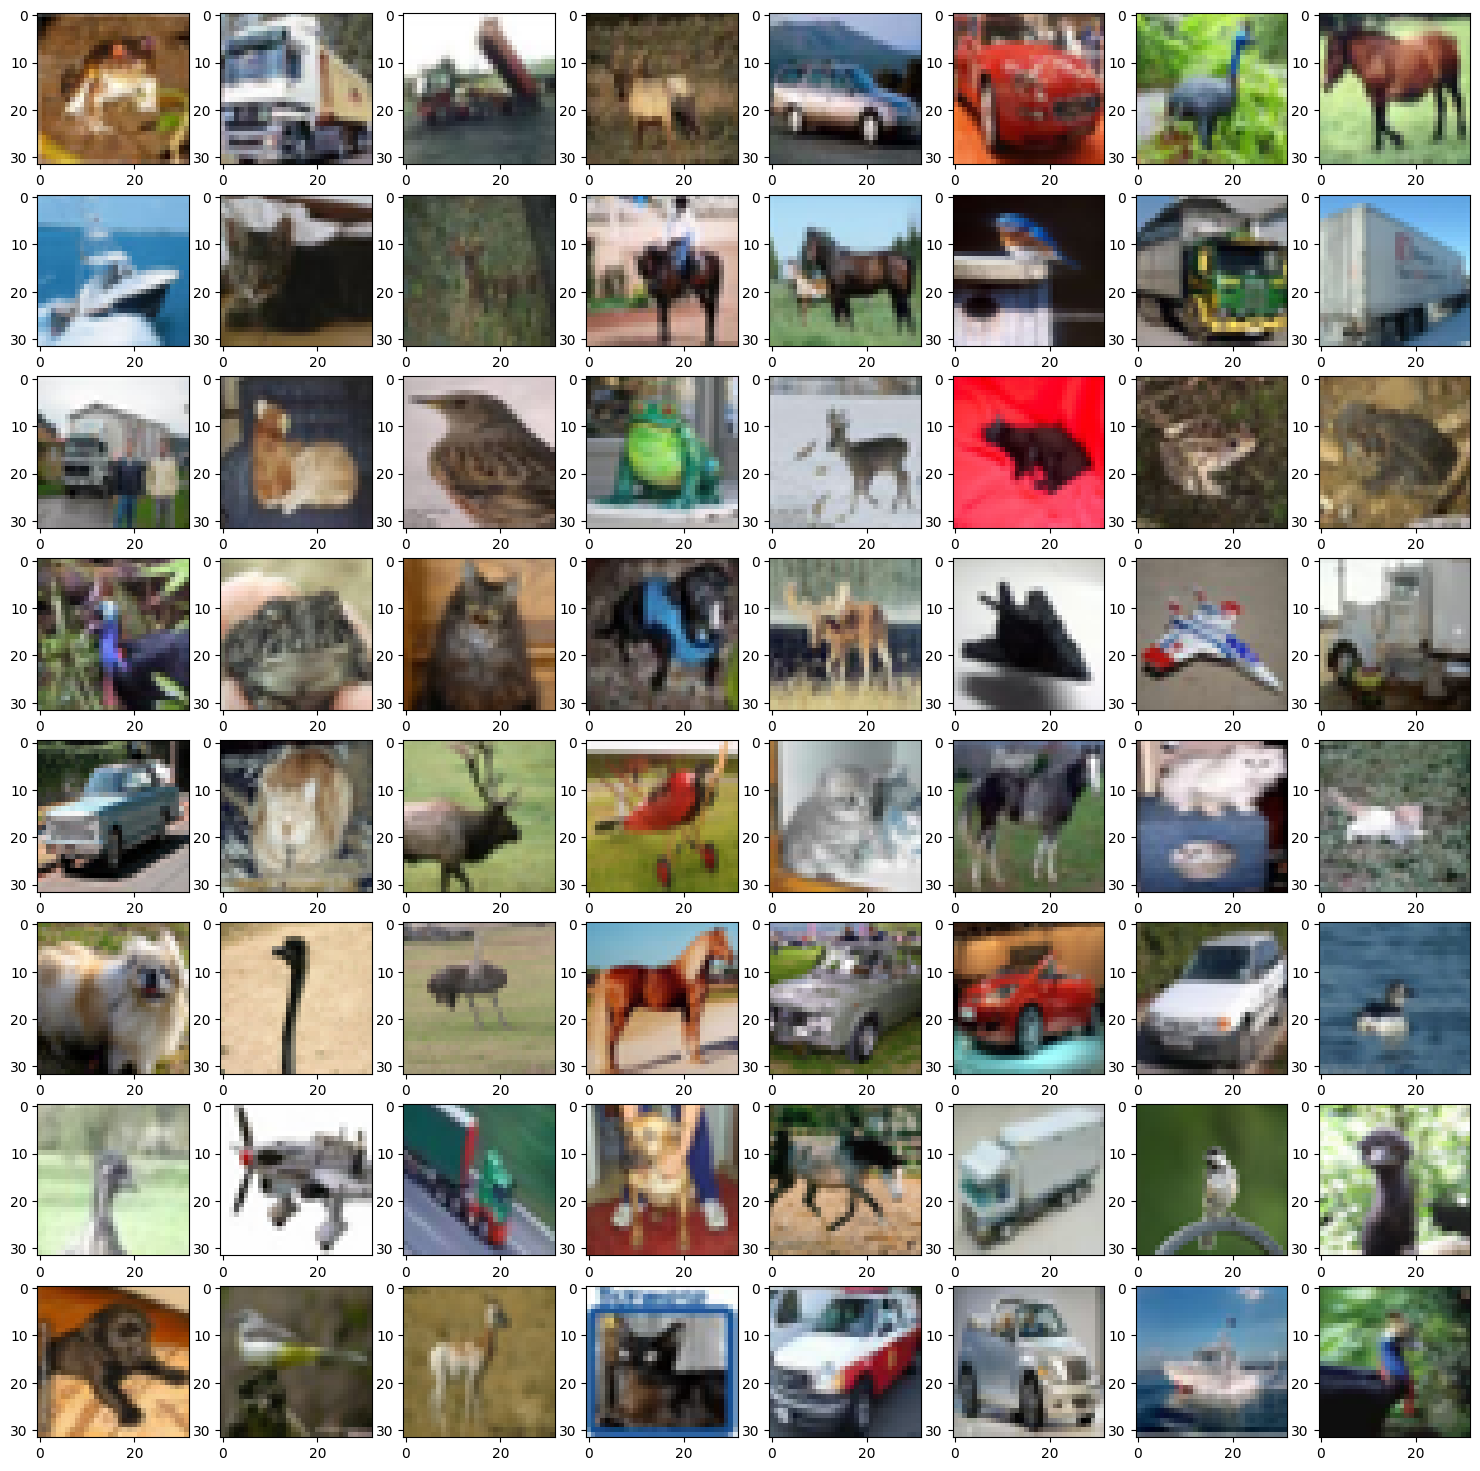

In [5]:
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range (0, 64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(X_train[i])

In [32]:
"""

# Define the CNN architecture
model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ]
)
"""
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(32,32,3), trainable=False)

num_of_classes = 10

model = Sequential([
    
    pretrained_model,
    Dense(num_of_classes)

])

model.summary()


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


ValueError: Exception encountered when calling layer "keras_layer_1" (type KerasLayer).

in user code:

    File "/home/omer_atique/.local/lib/python3.10/site-packages/tensorflow_hub/keras_layer.py", line 242, in call  *
        result = smart_cond.smart_cond(training,

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (4 total):
        * <tf.Tensor 'inputs:0' shape=(None, 32, 32, 3) dtype=float32>
        * False
        * False
        * 0.99
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}


Call arguments received by layer "keras_layer_1" (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=None

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callback = EarlyStopping(monitor = 'accuracy', patience = 3)

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test), callbacks=callback)


Epoch 1/20
391/391 [==============================] - 61s 152ms/step - loss: 1.5222 - accuracy: 0.4401 - val_loss: 1.2703 - val_accuracy: 0.5401
Epoch 2/20
391/391 [==============================] - 62s 158ms/step - loss: 1.2429 - accuracy: 0.5538 - val_loss: 1.0819 - val_accuracy: 0.6176
Epoch 3/20
391/391 [==============================] - 59s 150ms/step - loss: 1.0900 - accuracy: 0.6138 - val_loss: 0.9767 - val_accuracy: 0.6641
Epoch 4/20
391/391 [==============================] - 59s 151ms/step - loss: 0.9743 - accuracy: 0.6554 - val_loss: 0.8502 - val_accuracy: 0.7005
Epoch 5/20
391/391 [==============================] - 63s 161ms/step - loss: 0.9007 - accuracy: 0.6809 - val_loss: 0.8167 - val_accuracy: 0.7139
Epoch 6/20
391/391 [==============================] - 63s 160ms/step - loss: 0.8470 - accuracy: 0.7026 - val_loss: 0.7645 - val_accuracy: 0.7344
Epoch 7/20
391/391 [==============================] - 60s 155ms/step - loss: 0.7932 - accuracy: 0.7215 - val_loss: 0.7531 - val_ac

In [9]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6287545561790466
Test accuracy: 0.7896000146865845


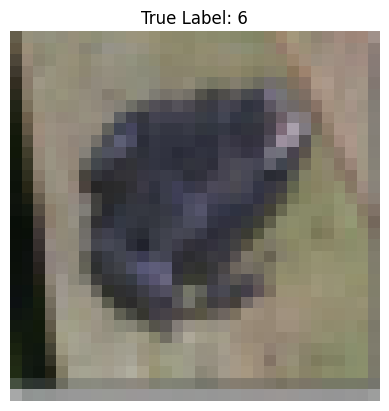

1/1 [==============================] - 0s 43ms/step
Predicted Label: frog


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a random image from the test set
index = np.random.randint(len(X_test))
image = X_test[index]
label = y_test[index]

# Display the image and true label
plt.imshow(image)
plt.axis('off')
plt.title(f'True Label: {np.argmax(label)}')
plt.show()

# Predict the class of the image using the trained model
predictions = model.predict(np.array([image]))
predicted_label = np.argmax(predictions)

labels = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# Display the predicted label
print('Predicted Label:', labels[predicted_label])